# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

X_train shape: (252, 11)
y_train shape: (252, 1)
X_test shape: (41, 11)
y_test shape: (41, 1)
Variáveis preditoras (X_train): ['Age', 'Income', 'Number of Children', 'Gender_encoded', 'MaritalStatus_encoded', 'Home Ownership_encoded', "Education_Associate's Degree", "Education_Bachelor's Degree", 'Education_Doctorate', 'Education_High School Diploma', "Education_Master's Degree"]
Variáveis preditoras (X_test): ['Age', 'Income', 'Number of Children', 'Gender_encoded', 'MaritalStatus_encoded', 'Home Ownership_encoded', "Education_Associate's Degree", "Education_Bachelor's Degree", 'Education_Doctorate', 'Education_High School Diploma', "Education_Master's Degree"]
Variável resposta (y_train): ['Credit Score_encoded']
Variável resposta (y_test): ['Credit Score_encoded']


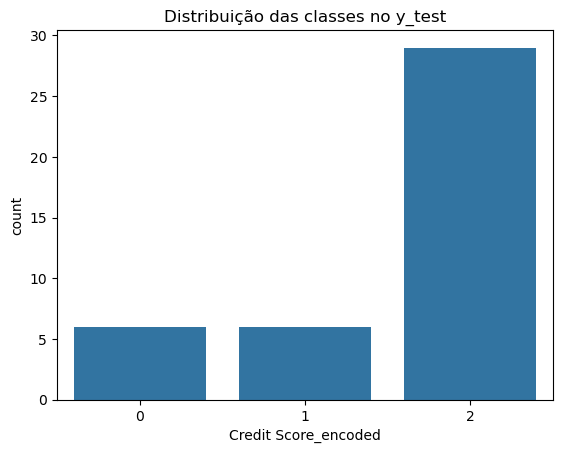

Distribuição de y_test:
Credit Score_encoded
2    29
1     6
0     6
Name: count, dtype: int64


In [28]:
# Copiei o que fiz no último exercício, já que a pedida é igual. Mas mudei a base de treino para o que foi balanceado no módulo 17, 
# algo que não fiz na atividade 20 por falta de conhecimento. Mas acredito que não afeta, já que o gráfico plotado é Y_test 
# e o teste não pode ser balanceado apenas o treino, confere?

# Subir bases
X_train = pd.read_csv('X_train_final_balanced.csv')
y_train = pd.read_csv('y_train_final_balanced.csv')
X_test = pd.read_csv('X_test_final.csv')
y_test = pd.read_csv('y_test_final.csv')

# Tamanho das bases
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Verificando as colunas
print(f'Variáveis preditoras (X_train): {list(X_train.columns)}')
print(f'Variáveis preditoras (X_test): {list(X_test.columns)}')
print(f'Variável resposta (y_train): {list(y_train.columns)}')
print(f'Variável resposta (y_test): {list(y_test.columns)}')

# Distribuição das classes no y_test
sns.countplot(data=y_test, x=y_test.columns[0])
plt.title('Distribuição das classes no y_test')
plt.show()

print('Distribuição de y_test:')
print(y_test[y_test.columns[0]].value_counts())

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

1 - Primeiro carregamos as bases de treino e teste, conferindo se está tudo certo, se a variável alvo está só no y e se X tem só as variáveis que usamos para prever.

2 - Depois criamos o modelo de árvore de decisão usando a função DecisionTreeClassifier e treinamos ele com os dados de treino.

3 - Com o modelo treinado, fazemos as previsões usando a base de teste, que serve pra avaliar como ele se sai com dados que nunca viu.

4 - Na sequência, avaliamos o modelo olhando a acurácia, a matriz de confusão e o relatório de classificação, pra entender se ele tá acertando bem e onde pode estar errando.

5 - E pra melhorar o modelo, podemos ajustar alguns parâmetros, como limitar a profundidade da árvore, definir o mínimo de dados pra dividir os nós e escolher o critério de decisão. Isso ajuda a deixar o modelo mais equilibrado, sem aprender demais só os dados de treino.

# 3) Aplique o algoritmo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modelo com os dados de treino.

In [30]:
modelo_arvore = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_train_pred = modelo_arvore.predict(X_train)
acuracia_treino = accuracy_score(y_train, y_train_pred)
print(f'A acurácia do modelo na base de treino é: {acuracia_treino:.2%}')

A acurácia do modelo na base de treino é: 100.00%


In [34]:
relatorio = classification_report(y_train, y_train_pred)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [38]:
y_test_pred = modelo_arvore.predict(X_test)
acuracia_teste = accuracy_score(y_test, y_test_pred)
print(f'A acurácia do modelo na base de teste é: {acuracia_teste:.2%}')

A acurácia do modelo na base de teste é: 97.56%


In [40]:
relatorio_teste = classification_report(y_test, y_test_pred)
print("Relatório de Classificação (teste):")
print(relatorio_teste)

Relatório de Classificação (teste):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      1.00      0.92         6
           2       1.00      0.97      0.98        29

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



Avaliação: 

- A pequena diferença entre treino (100%) e teste (97.56%) sugere que o modelo generaliza bem para dados novos, apesar do possível overfitting na árvore de decisão (visto que deu 100% com todas as métricas do treino).

- O bom desempenho geral indica que o balanceamento com SMOTE funcionou bem para evitar problemas com classes desbalanceadas.

- Deve-se considerar a quantidade limitada de dados na base de teste, entre 6 e 41 amostras por classe.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

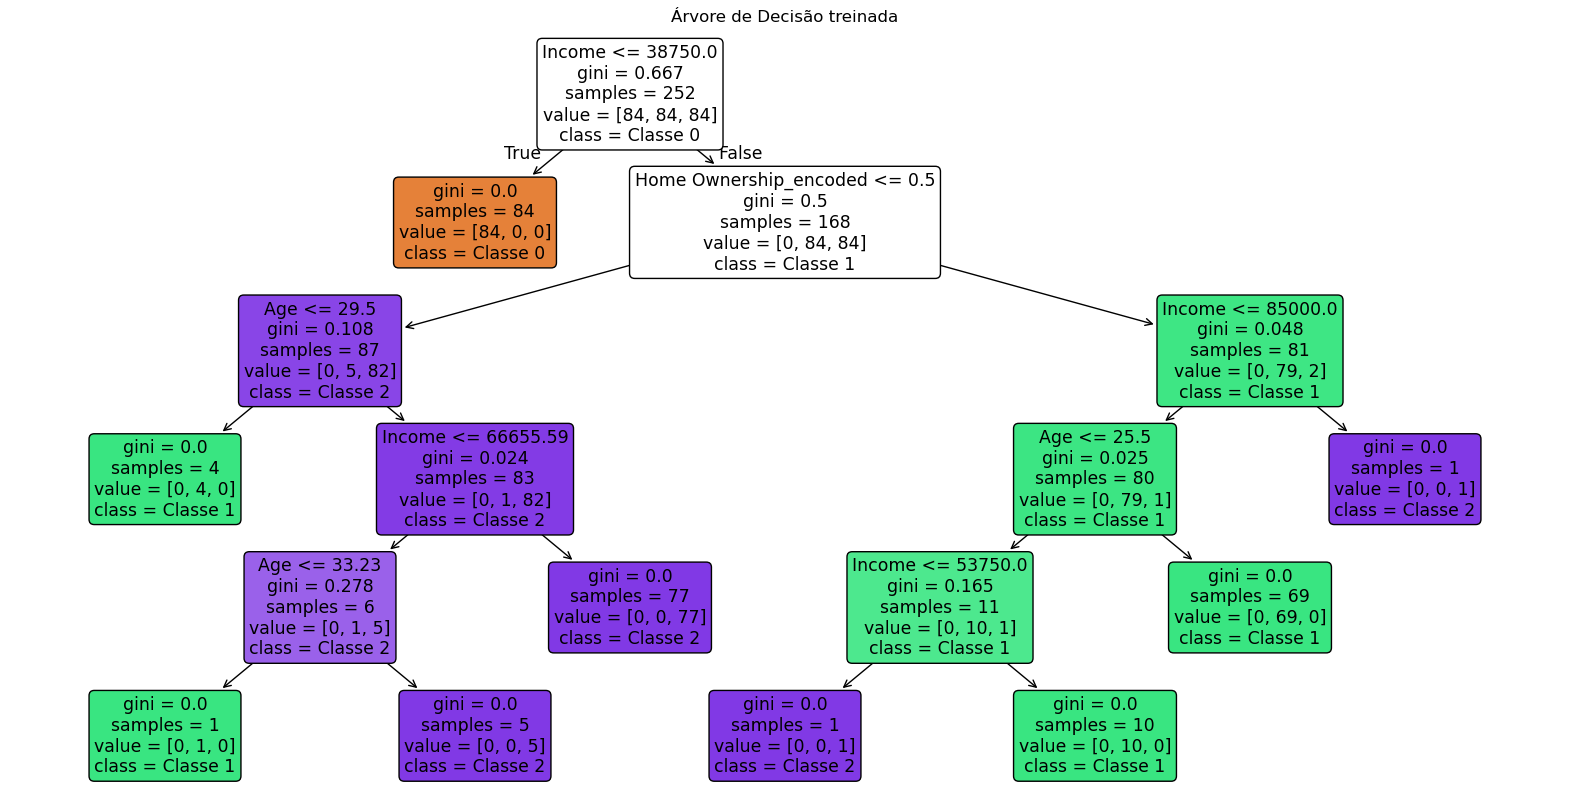

In [45]:
plt.figure(figsize=(20,10))
plot_tree(modelo_arvore, 
          filled=True, 
          rounded=True, 
          class_names=['Classe 0', 'Classe 1', 'Classe 2'], 
          feature_names=X_train.columns)
plt.title('Árvore de Decisão treinada')
plt.show()

Sim, é possível fazer uma avaliação visual e a profundidade da árvore é 5.

# 6) Identifique as 2 principais features do modelo.


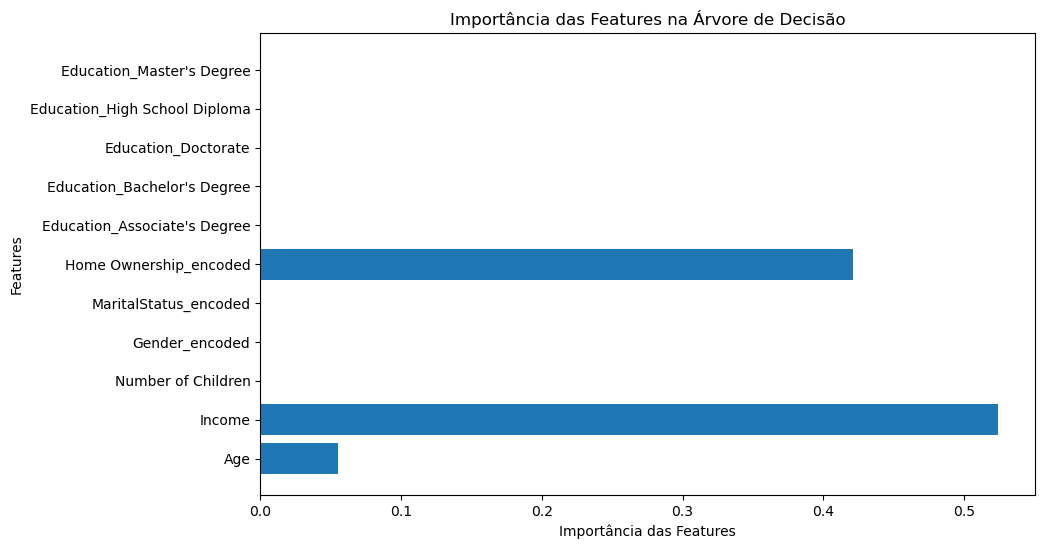

In [55]:
importancias_features = modelo_arvore.feature_importances_

nomes_features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(nomes_features, importancias_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Árvore de Decisão')
plt.show()

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [57]:
X_train_reduzido = X_train[['Income', 'Home Ownership_encoded']]
X_test_reduzido = X_test[['Income', 'Home Ownership_encoded']]

In [59]:
modelo_arvore_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo_arvore_reduzido.fit(X_train_reduzido, y_train)

DecisionTreeClassifier(random_state=0)

In [61]:
y_train_pred = modelo_arvore_reduzido.predict(X_train_reduzido)
acuracia_treino = accuracy_score(y_train, y_train_pred)
print(f'A acurácia do modelo na base de treino é: {acuracia_treino:.2%}')

print('Relatório de Classificação (treino):')
print(classification_report(y_train, y_train_pred))

A acurácia do modelo na base de treino é: 99.60%
Relatório de Classificação (treino):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.99      1.00      0.99        84
           2       1.00      0.99      0.99        84

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252



In [63]:
y_test_pred = modelo_arvore_reduzido.predict(X_test_reduzido)
acuracia_teste = accuracy_score(y_test, y_test_pred)
print(f'A acurácia do modelo na base de teste é: {acuracia_teste:.2%}')

print('Relatório de Classificação (teste):')
print(classification_report(y_test, y_test_pred))

A acurácia do modelo na base de teste é: 95.12%
Relatório de Classificação (teste):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



Não, o desempenho da árvore com duas features não está melhor. Apesar de mais simples e fácil de interpretar, ela teve uma leve queda na acurácia (de 97,56% para 95,12%) e, principalmente, no recall da classe 1 (de 1.00 para 0.83), o que indica que passou a errar mais nessa classe. O modelo completo é mais robusto e performa melhor, mesmo sendo um pouco mais complexo.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Embora o modelo Naive Bayes tenha mostrado 100% de acurácia e recall no teste, esse resultado deve ser visto com cuidado, pois ele foi treinado com uma base desbalanceada, erro e falta de conhecimento do meu eu do passado, o que pode esconder erros em classes com poucos exemplos e indicar sinais de overfitting.

Já a Árvore de Decisão foi treinada de forma mais adequada, usando uma base balanceada e todas as variáveis disponíveis. Na atividade 4, ela teve os melhores resultados, com 97,56% de acurácia e 99% de recall macro, mostrando ótimo desempenho sem exagerar no ajuste aos dados.

Mesmo que os números sejam um pouco menores, o modelo de Árvore de Decisão é o mais confiável e equilibrado, pois foi treinado corretamente, avaliou bem todas as classes e ainda fugiu do overfitting.